Gradient Decent

$\theta_{i+1} = \theta_{i-1} - \alpha \frac{\partial{loss(\theta)}}{\partial{\theta}}$

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Example 1 

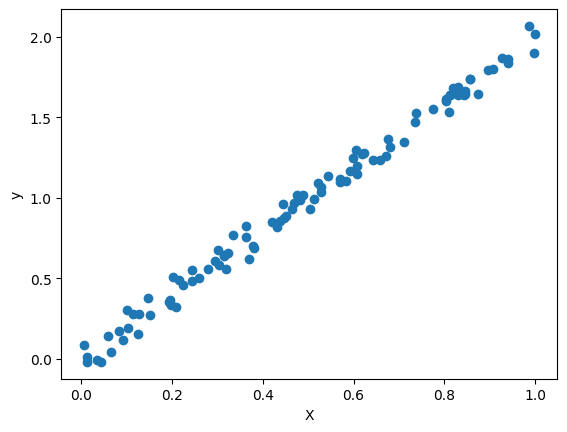

In [38]:
# Creating the dataset
n = 100
X = np.random.rand(n)
y = 2*X + 0.05*np.random.randn(n)
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [63]:
def loss_function(theta,X_tr, y_tr):
    return mean_squared_error(theta*X_tr - y_tr)

def gradient_loss_function(theta, X_tr, y_tr):
    return 2*(theta*np.sum(X_tr) - np.sum(y_tr))*np.sum(X_tr)

def model(theta, X_t):
    return theta*X_t

0.5158568285438033


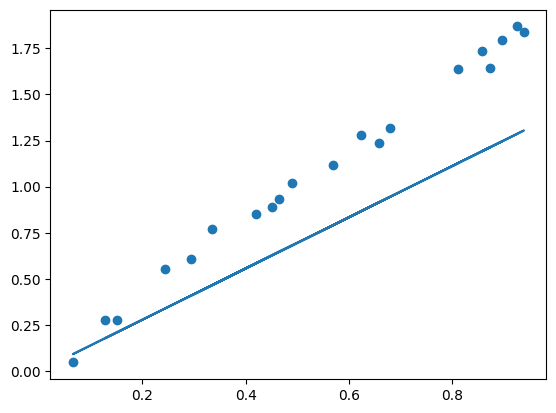

1.3895089438954205


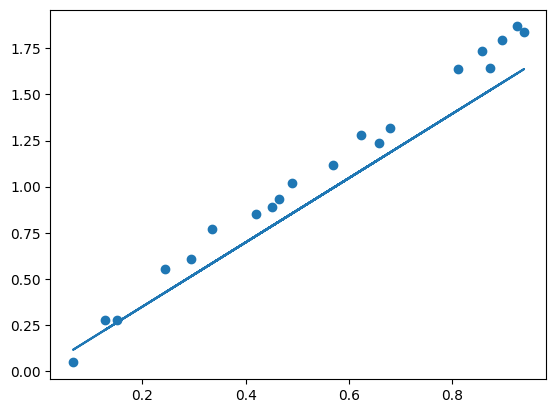

1.7438133973834289


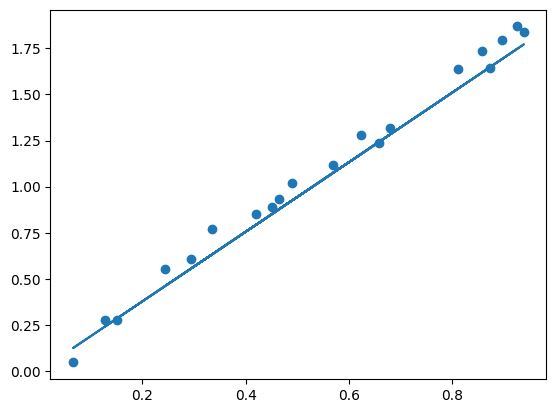

1.8874994751203482


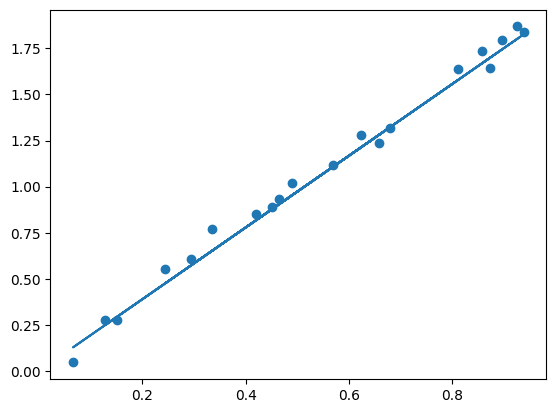

1.9457705149906352


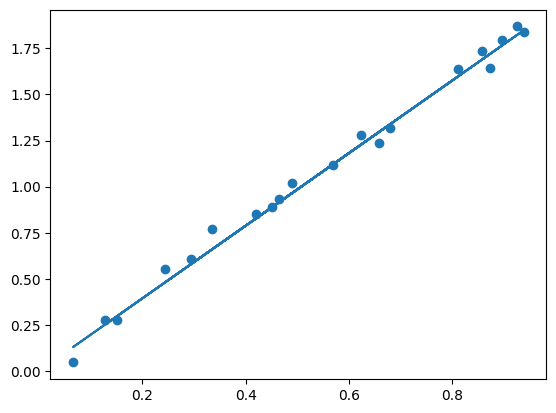

In [65]:
max_iterations = 5
alpha = 0.2
theta = np.random.rand() # initializing theta
for i in range(max_iterations):
    print(theta)
    theta = theta - 0.0002*gradient_loss_function(theta, X_train, y_train)  # learning theta
    plt.scatter(X_test, y_test)
    plt.plot(X_test, model(theta, X_test))
    plt.show()

We can see the performance of the model improves as we use gradient decent to train